In [172]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os

#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [122]:
data = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")

print(data.shape)
print(unseen.shape)
print(sample.shape)

(69999, 172)
(30000, 171)
(30000, 2)


In [123]:
data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [124]:
data.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [125]:
# Dropping circle_id since values are same - 109
# Dropping the rest of the columns since values are zero/blanks

data.drop(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
          'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'], axis = 1, inplace = True)

In [126]:
data

,id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,...,0,0,NaN,NaN,NaN,1958,0.00,0.00,0.00,0
1,1,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,...,0,0,NaN,1.0,NaN,710,0.00,0.00,0.00,0
2,2,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,0.000,0.53,15.93,0.00,...,0,0,NaN,NaN,NaN,882,0.00,0.00,0.00,0
3,3,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,111.095,7.26,16.01,0.00,...,0,0,NaN,NaN,NaN,982,0.00,0.00,0.00,0
4,4,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,101.565,21.28,4.83,6.13,...,1,0,1.0,1.0,1.0,647,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,69994,6/30/2014,7/31/2014,8/31/2014,15.760,410.924,329.136,0.00,7.36,10.93,...,1,0,NaN,1.0,1.0,221,0.00,0.00,0.00,0
69995,69995,6/30/2014,7/31/2014,8/31/2014,160.083,289.129,265.772,116.54,196.46,232.63,...,0,0,NaN,NaN,NaN,712,0.00,0.00,0.00,0
69996,69996,6/30/2014,7/31/2014,8/31/2014,372.088,258.374,279.782,77.13,68.44,78.44,...,0,0,NaN,NaN,NaN,879,0.00,0.00,0.00,0
69997,69997,6/30/2014,7/31/2014,8/31/2014,238.575,245.414,145.062,14.01,7.64,6.71,...,0,0,1.0,1.0,1.0,277,664.25,1402.96,990.97,0


In [127]:
# checking for nulls

percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
missing_value_df[missing_value_df['percent_missing'] > 50]

,column_name,percent_missing
date_of_last_rech_data_6,date_of_last_rech_data_6,74.902499
date_of_last_rech_data_7,date_of_last_rech_data_7,74.478207
date_of_last_rech_data_8,date_of_last_rech_data_8,73.689624
total_rech_data_6,total_rech_data_6,74.902499
total_rech_data_7,total_rech_data_7,74.478207
total_rech_data_8,total_rech_data_8,73.689624
max_rech_data_6,max_rech_data_6,74.902499
max_rech_data_7,max_rech_data_7,74.478207
max_rech_data_8,max_rech_data_8,73.689624
count_rech_2g_6,count_rech_2g_6,74.902499


In [128]:
data.fillna(0, inplace = True)

In [129]:
data.columns[1:30]

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7'],
      dtype='object')

<AxesSubplot:>

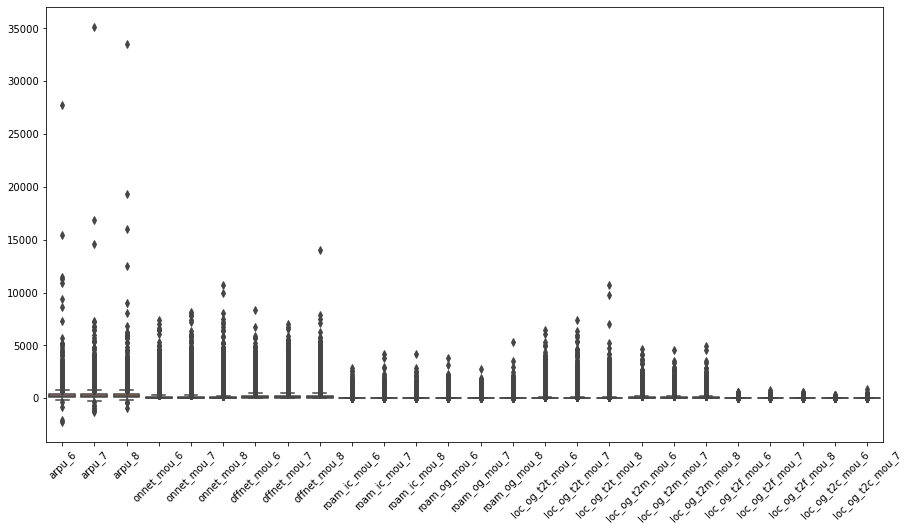

In [130]:
# checking for outliers

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = data[data.columns[1:30]])

<AxesSubplot:>

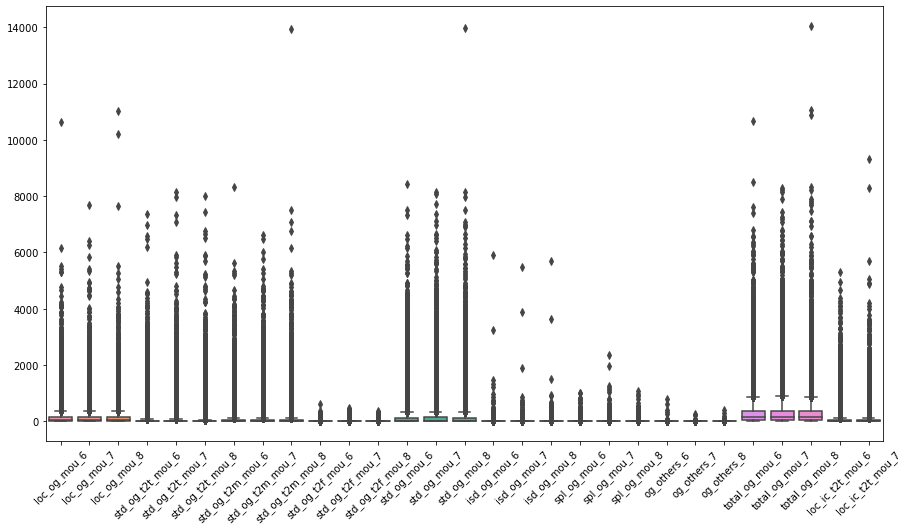

In [131]:
# checking for outliers

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = data[data.columns[31:60]])

<AxesSubplot:>

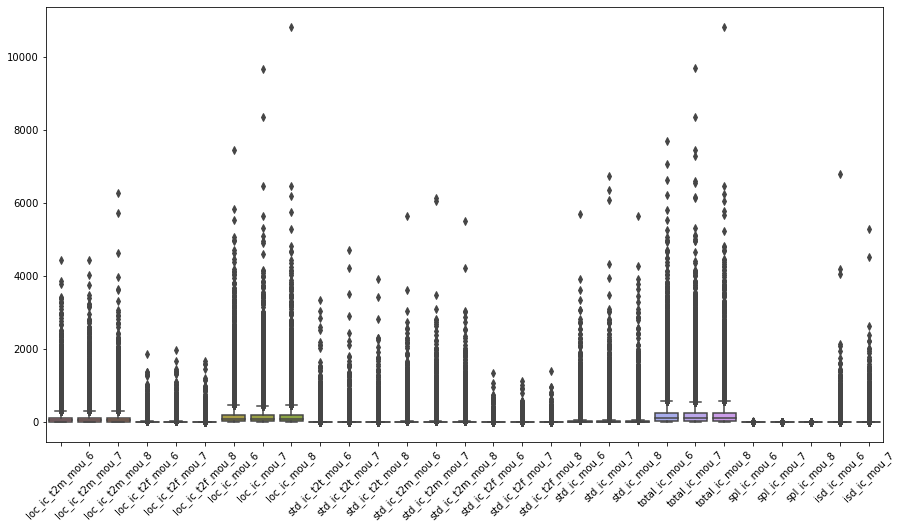

In [132]:
# checking for outliers

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = data[data.columns[61:90]])

In [133]:
data.head()

,id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,...,0,0,0.0,0.0,0.0,1958,0.0,0.0,0.0,0
1,1,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,...,0,0,0.0,1.0,0.0,710,0.0,0.0,0.0,0
2,2,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,0.000,0.53,15.93,0.00,...,0,0,0.0,0.0,0.0,882,0.0,0.0,0.0,0
3,3,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,111.095,7.26,16.01,0.00,...,0,0,0.0,0.0,0.0,982,0.0,0.0,0.0,0
4,4,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,101.565,21.28,4.83,6.13,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [148]:
data['date_of_last_rech_6'] = (pd.to_datetime(data['date_of_last_rech_6']).dt.day)
data['date_of_last_rech_7'] = (pd.to_datetime(data['date_of_last_rech_7']).dt.day)
data['date_of_last_rech_8'] = (pd.to_datetime(data['date_of_last_rech_8']).dt.day)

data['date_of_last_rech_data_6'] = (pd.to_datetime(data['date_of_last_rech_data_6']).dt.day)
data['date_of_last_rech_data_7'] = (pd.to_datetime(data['date_of_last_rech_data_7']).dt.day)
data['date_of_last_rech_data_8'] = (pd.to_datetime(data['date_of_last_rech_data_8']).dt.day)

In [149]:
data.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8'], axis = 1, inplace = True)

<AxesSubplot:>

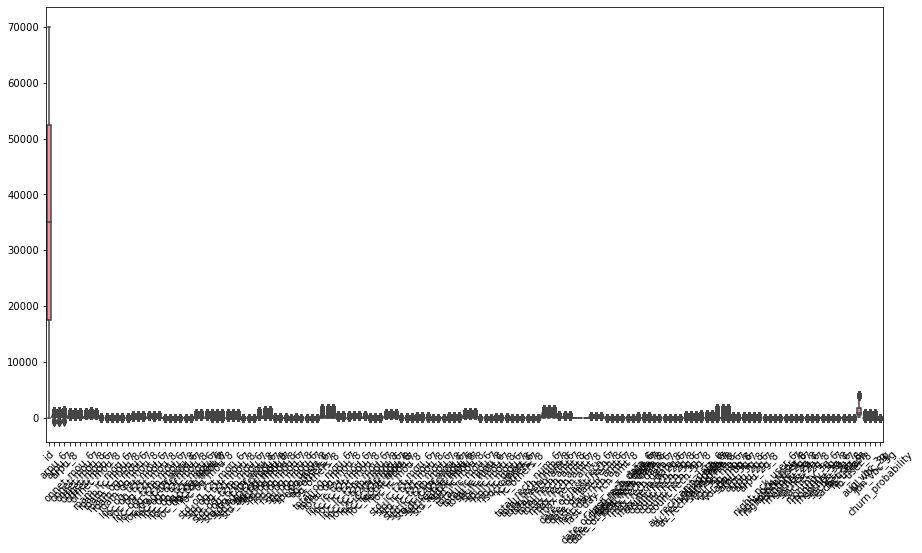

In [150]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

data = data.apply(cap_outliers, axis=0)

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = data)

In [157]:
corr_df = pd.DataFrame(data.corr())
corr_df[corr_df['churn_probability'] > 0.5][['churn_probability']].sort_values(['churn_probability'], ascending = False)

,churn_probability
churn_probability,1.0


In [159]:
# Test Train split

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(69999, 158) (69999,)
(55999, 158) (14000, 158) (55999,) (14000,)


In [164]:
scale = StandardScaler()
X_train_filtered2 = scale.fit_transform(X_train)

In [165]:
X_train_filtered2

array([[-0.56761205, -0.86310618, -0.81256477, ..., -0.32031757,
        -0.31110521, -0.30196779],
       [ 1.62697649, -1.04619621, -1.02176214, ..., -0.32031757,
        -0.31110521, -0.30196779],
       [-1.56850582, -1.04619621,  0.25106702, ..., -0.32031757,
        -0.31110521, -0.30196779],
       ...,
       [-0.1974381 , -1.01158937, -0.99083905, ..., -0.32031757,
        -0.31110521, -0.30196779],
       [-1.70211656, -0.30591444,  0.02143307, ..., -0.32031757,
        -0.31110521, -0.30196779],
       [-1.08420397, -0.38795995, -0.90200601, ..., -0.32031757,
        -0.31110521, -0.30196779]])

<BarContainer object of 158 artists>

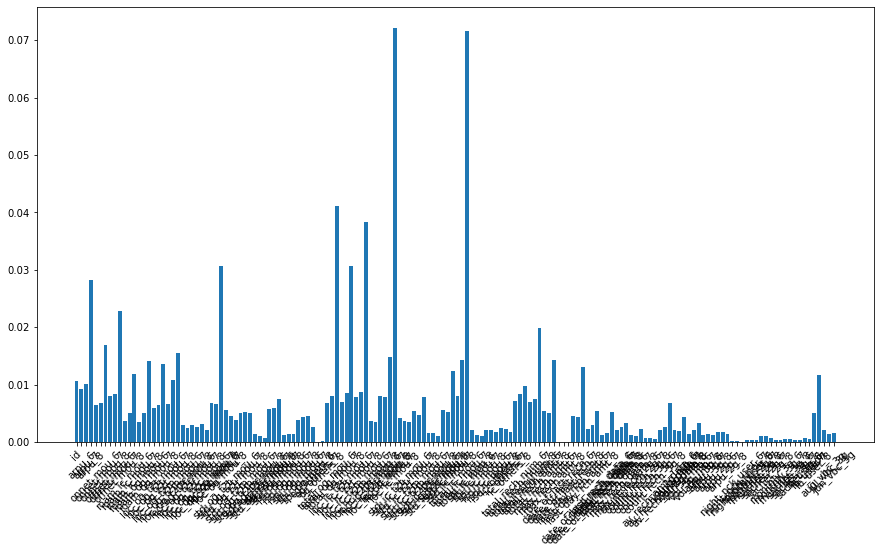

In [168]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(X_train_filtered2, y_train)

feature_importances = pd.DataFrame({'col':X_train.columns, 'importance':rf.feature_importances_})

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
plt.bar(feature_importances['col'], feature_importances['importance'])

In [170]:
feature_importances.sort_values(['importance'], ascending = False)

,col,importance
66,loc_ic_mou_8,0.072171
81,total_ic_mou_8,0.071639
54,total_og_mou_8,0.041043
60,loc_ic_t2m_mou_8,0.038317
30,loc_og_mou_8,0.030708
...,...,...
50,og_others_7,0.000078
138,night_pck_user_8,0.000061
100,date_of_last_rech_6,0.000000
101,date_of_last_rech_7,0.000000


In [ ]:
#0.072

In [174]:
scaler = MinMaxScaler()
col = X_train.columns

X_train[col] = scaler.fit_transform(X_train[col])

In [175]:
X_train

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
23476,0.335381,0.382849,0.392166,0.413756,0.003810,0.001985,0.005072,0.010613,0.012777,0.009312,...,0.0,0.0,0.0,1.0,1.0,1.0,0.164960,0.0,0.0,0.0
67857,0.969413,0.358806,0.365364,0.435490,0.000000,0.000000,0.092572,0.000000,0.000000,0.019614,...,0.0,0.0,0.0,0.0,0.0,0.0,0.207803,0.0,0.0,0.0
3235,0.046216,0.358806,0.528438,0.624227,0.000000,0.099224,0.335801,0.000000,0.363674,0.474101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.308883,0.0,0.0,0.0
25045,0.357796,0.552889,0.645677,0.564718,0.004945,0.023584,0.031809,0.173398,0.285906,0.160954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.627514,0.0,0.0,0.0
29039,0.414855,0.475137,0.493968,0.525229,0.042577,0.032193,0.060341,0.272884,0.232485,0.391290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.539262,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18630,0.266150,0.411701,0.383561,0.386983,0.021505,0.018029,0.065164,0.047162,0.017169,0.020377,...,0.0,0.0,0.0,0.0,0.0,0.0,0.477947,0.0,0.0,0.0
60919,0.870296,0.472668,0.503605,0.506568,0.255212,0.047398,0.134958,0.171247,0.418649,0.317028,...,0.0,0.0,0.0,0.0,0.0,0.0,0.170604,0.0,0.0,0.0
30962,0.442327,0.363350,0.369325,0.444068,0.000000,0.000334,0.004169,0.014747,0.004087,0.275303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.584671,0.0,0.0,0.0
533,0.007615,0.456018,0.499018,0.571459,0.035510,0.051712,0.129031,0.137035,0.447582,0.508328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.601860,0.0,0.0,0.0


<BarContainer object of 158 artists>

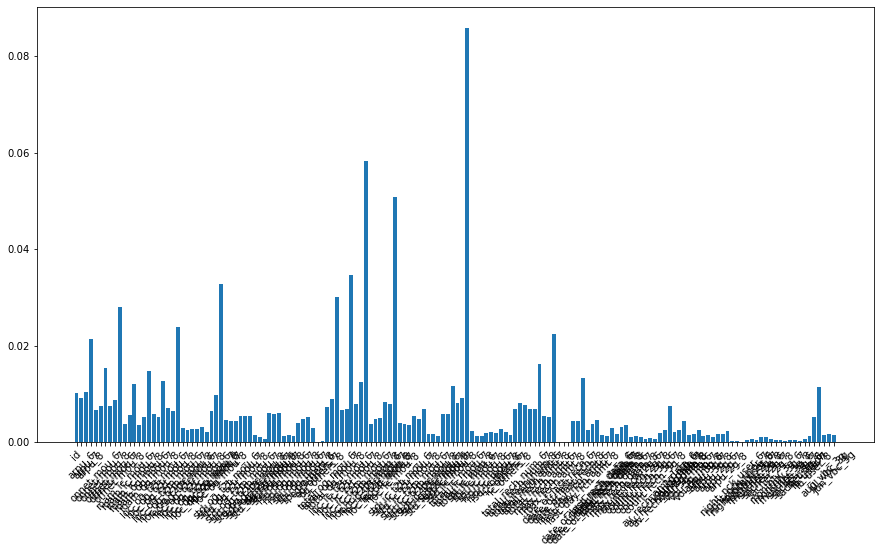

In [176]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

feature_importances = pd.DataFrame({'col':X_train.columns, 'importance':rf.feature_importances_})

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
plt.bar(feature_importances['col'], feature_importances['importance'])

In [177]:
feature_importances.sort_values(['importance'], ascending = False)

,col,importance
81,total_ic_mou_8,0.085919
60,loc_ic_t2m_mou_8,0.058298
66,loc_ic_mou_8,0.050881
57,loc_ic_t2t_mou_8,0.034549
30,loc_og_mou_8,0.032736
...,...,...
50,og_others_7,0.000077
138,night_pck_user_8,0.000050
100,date_of_last_rech_6,0.000000
102,date_of_last_rech_8,0.000000


<AxesSubplot:>

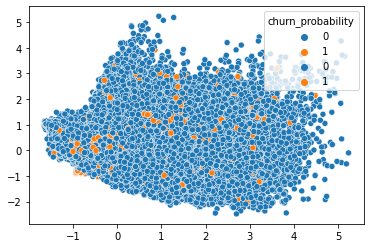

In [180]:
pca = PCA()
pca_components = pca.fit_transform(X_train)
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=y_train)

sns.scatterplot(x=pca_components[:,1], y=pca_components[:,2], hue=y_train)

<BarContainer object of 158 artists>

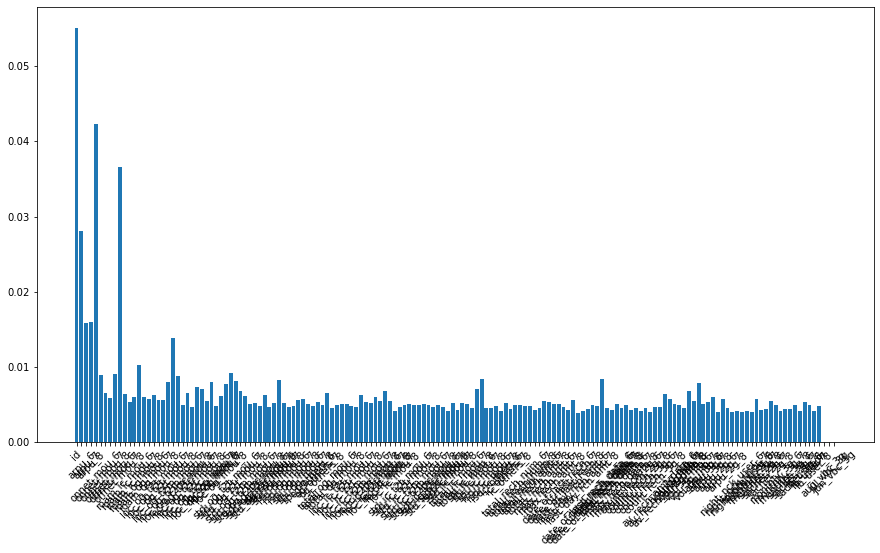

In [182]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(pca_components, y_train)

feature_importances = pd.DataFrame({'col':X_train.columns, 
                                    'importance':rf.feature_importances_})

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
plt.bar(feature_importances['col'], feature_importances['importance'])

In [184]:
feature_importances.sort_values(['importance'], ascending = False)

,col,importance
0,id,0.055104
4,onnet_mou_6,0.042353
9,offnet_mou_8,0.036607
1,arpu_6,0.028026
3,arpu_8,0.015938
...,...,...
140,monthly_2g_7,0.003943
104,last_day_rch_amt_7,0.003854
155,aug_vbc_3g,0.000000
156,jul_vbc_3g,0.000000


In [187]:
feature_importances[feature_importances['col'] == 'date_of_last_rech_data_6']

,col,importance
106,date_of_last_rech_data_6,0.004408
